# 分群補充_實例討論(鳶尾花資料來分群)

- 在我們已經知道label的資料上，嘗試做分群，並且看用哪種分群技術比較好
- 比較 K-Means 與 Hierarchical Clustering與DBSCAN
- 會先用silhouette_avg來評估分群的績效
- IRIS的資料 真的分三群最好嗎？
- 不用分訓練集/測試集

In [1]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料 (已知花分三類 有四個特徵)
iris = datasets.load_iris()
X = iris.data 
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
----------我是87分的分隔線----------
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
----------我是87分的分隔線----------


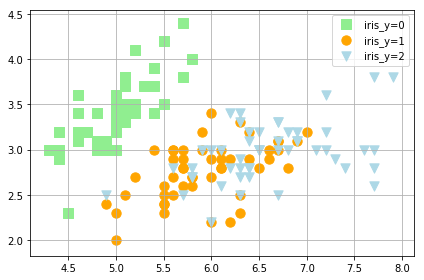

In [2]:
#使用k-means++  ==>sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0).fit(X)
km.fit(X)
# n_clusters=3 ==>分三群
# 印出分群結果
print("分群結果：")
print(km.labels_)
print("----------我是87分的分隔線----------")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print("----------我是87分的分隔線----------")

kmy_pred = km.fit_predict(X)


plt.scatter(X[iris_y==0,0], 
            X[iris_y==0,1], 
            s=87, 
            c='lightgreen', 
            marker='s', 
            label='iris_y=0')
plt.scatter(X[iris_y==1,0], 
            X[iris_y==1,1], 
            s=87, 
            c='orange', 
            marker='o', 
            label='iris_y=1')
plt.scatter(X[iris_y==2,0], 
            X[iris_y==2,1], 
            s=87, 
            c='lightblue', 
            marker='v', 
            label='iris_y=2')
plt.legend()
plt.grid()
plt.tight_layout()

#plt.scatter(X[:, 0], X[:, 1], c=kmy_pred)
plt.show()

In [3]:
#套件內建評估KM效能的方法SSE
km.inertia_

78.94084142614602

In [4]:
#我們使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效
#WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）
from sklearn import  metrics

# 印出績效
silhouette_avg = metrics.silhouette_score(X, km.labels_)
print(silhouette_avg)

0.5525919445213676


分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
----------我是87分的分隔線----------
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
----------我是87分的分隔線----------


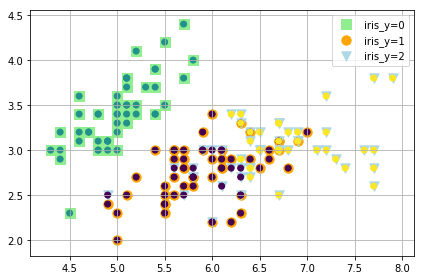

In [5]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)


# 印出分群結果
print("分群結果：")
print(ac.labels_)
print("----------我是87分的分隔線----------")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print("----------我是87分的分隔線----------")

acy_pred = ac.fit_predict(X)
plt.scatter(X[iris_y==0,0], 
            X[iris_y==0,1], 
            s=87, 
            c='lightgreen', 
            marker='s', 
            label='iris_y=0')
plt.scatter(X[iris_y==1,0], 
            X[iris_y==1,1], 
            s=87, 
            c='orange', 
            marker='o', 
            label='iris_y=1')
plt.scatter(X[iris_y==2,0], 
            X[iris_y==2,1], 
            s=87, 
            c='lightblue', 
            marker='v', 
            label='iris_y=2')
plt.legend()
plt.grid()
plt.tight_layout()

plt.scatter(X[:, 0], X[:, 1], c=acy_pred)
plt.show()

In [6]:
#我們使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效
#WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）
from sklearn import  metrics

# 印出績效
silhouette_avg = metrics.silhouette_score(X, ac.labels_)
print(silhouette_avg)

0.5540972907866913


分群結果：
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
----------我是87分的分隔線----------
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
----------我是87分的分隔線----------


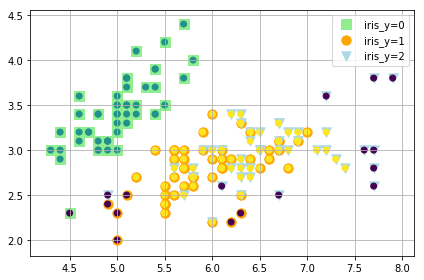

In [7]:
from sklearn.cluster import DBSCAN

#db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit(X)
db = DBSCAN().fit(X) #因為上面例子分群效果太差，所以用內設值試試看

# 印出分群結果
print("分群結果：")
print(db.labels_)
print("----------我是87分的分隔線----------")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print("----------我是87分的分隔線----------")

dby_pred = db.fit_predict(X)
plt.scatter(X[iris_y==0,0], 
            X[iris_y==0,1], 
            s=87, 
            c='lightgreen', 
            marker='s', 
            label='iris_y=0')
plt.scatter(X[iris_y==1,0], 
            X[iris_y==1,1], 
            s=87, 
            c='orange', 
            marker='o', 
            label='iris_y=1')
plt.scatter(X[iris_y==2,0], 
            X[iris_y==2,1], 
            s=87, 
            c='lightblue', 
            marker='v', 
            label='iris_y=2')
plt.legend()
plt.grid()
plt.tight_layout()

plt.scatter(X[:, 0], X[:, 1], c=dby_pred)
plt.show()

In [8]:
#我們使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效
#WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）
from sklearn import  metrics

# 印出績效
silhouette_avg = metrics.silhouette_score(X, db.labels_)
print(silhouette_avg)

0.4858423545758963


In [9]:
#三種結果的比較

print("KM分群結果：")
print(metrics.silhouette_score(X, km.labels_))
print("----------我是87分的分隔線----------")
print("ac分群結果：")
print(metrics.silhouette_score(X, ac.labels_))
print("----------我是87分的分隔線----------")
print("db分群結果：")
print(metrics.silhouette_score(X, db.labels_))

KM分群結果：
0.5525919445213676
----------我是87分的分隔線----------
ac分群結果：
0.5540972907866913
----------我是87分的分隔線----------
db分群結果：
0.4858423545758963


# IRIS的資料 真的分三群最好嗎？

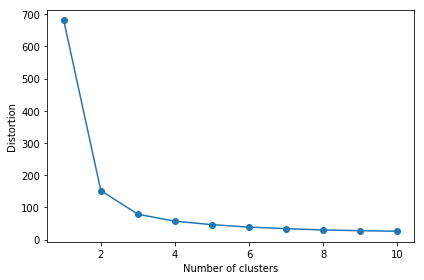

In [10]:
#用KM的量測來看
#好像 分 2 和 3組 最好
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

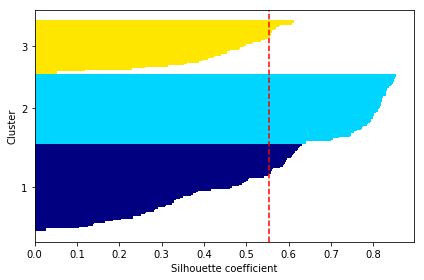

In [11]:
#用 silhouette 圖看 先分三組
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 -1-1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

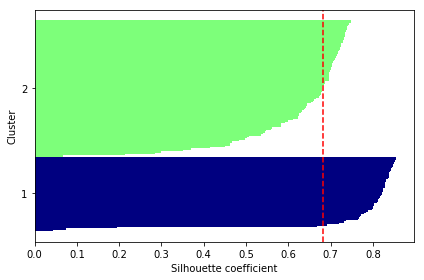

In [12]:
#用 silhouette 圖看 分兩組  看似好像比分三組好
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples #計算silhouette分數 -1-1之間 越接近0代表此樣本分得不好

km = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]                #‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #歐式距離 
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

In [13]:
import pandas as pd
df = pd.DataFrame(X)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            5.4          3.9           1.3          0.4
17            5.1          3.5           1.4          0.3
18            5.7          3.8           1.7          0.3
19            5.1          3.8           1.5          0.3
20            5.4          3.4           1.7          0.2
21            5.1          3.7           1.5          0.4
22            4.6          3.6           1.0          0.2
23            5.1          3.3           1.7          0.5
24            4.8          3.4           1.9          0.2
25            5.0          3.0           1.6          0.2
26            5.0          3.4           1.6          0.4
27            5.2          3.5           1.5          0.2
28            5.2          3.4           1.4          0.2
29            4.7          3.2           1.6          0.2
..            ...          ...           ...          ...
120           6.9          3.2           5.7          2.3
121           5.6          2.8           4.9          2.0
122           7.7          2.8           6.7          2.0
123           6.3          2.7           4.9          1.8
124           6.7          3.3           5.7          2.1
125           7.2          3.2           6.0          1.8
126           6.2          2.8           4.8          1.8
127           6.1          3.0           4.9          1.8
128           6.4          2.8           5.6          2.1
129           7.2          3.0           5.8          1.6
130           7.4          2.8           6.1          1.9
131           7.9          3.8           6.4          2.0
132           6.4          2.8           5.6          2.2
133           6.3          2.8           5.1          1.5
134           6.1          2.6           5.6          1.4
135           7.7          3.0           6.1          2.3
136           6.3          3.4           5.6          2.4
137           6.4          3.1           5.5          1.8
138           6.0          3.0           4.8          1.8
139           6.9          3.1           5.4          2.1
140           6.7          3.1           5.6          2.4
141           6.9          3.1           5.1          2.3
142           5.8          2.7           5.1          1.9
143           6.8          3.2           5.9          2.3
144           6.7          3.3           5.7          2.5
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

In [14]:
#correct approach: Input sample matrix
#用裡面的值去算
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist,squareform
row_clusters = linkage(df, method='ward', metric='euclidean')

pd.DataFrame(row_clusters, 
             columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

row label 1  row label 2   distance  no. of items in clust.
cluster 1            9.0         34.0   0.000000                     2.0
cluster 2           37.0        150.0   0.000000                     3.0
cluster 3          101.0        142.0   0.000000                     2.0
cluster 4            7.0         39.0   0.100000                     2.0
cluster 5            0.0         17.0   0.100000                     2.0
cluster 6          128.0        132.0   0.100000                     2.0
cluster 7           10.0         48.0   0.100000                     2.0
cluster 8           19.0         21.0   0.141421                     2.0
cluster 9           29.0         30.0   0.141421                     2.0
cluster 10          57.0         93.0   0.141421                     2.0
cluster 11          80.0         81.0   0.141421                     2.0
cluster 12         116.0        137.0   0.141421                     2.0
cluster 13           8.0         38.0   0.141421                     2.0
cluster 14           3.0         47.0   0.141421                     2.0
cluster 15          27.0         28.0   0.141421                     2.0
cluster 16          82.0         92.0   0.141421                     2.0
cluster 17          95.0         96.0   0.141421                     2.0
cluster 18         127.0        138.0   0.141421                     2.0
cluster 19           1.0         45.0   0.141421                     2.0
cluster 20          63.0         91.0   0.141421                     2.0
cluster 21          65.0         75.0   0.141421                     2.0
cluster 22          40.0        154.0   0.173205                     3.0
cluster 23         123.0        126.0   0.173205                     2.0
cluster 24           4.0        171.0   0.173205                     4.0
cluster 25          49.0        153.0   0.173205                     3.0
cluster 26         112.0        139.0   0.173205                     2.0
cluster 27          94.0         99.0   0.173205                     2.0
cluster 28          12.0        168.0   0.182574                     3.0
cluster 29          88.0        166.0   0.182574                     3.0
cluster 30          66.0         84.0   0.200000                     2.0
...                  ...          ...        ...                     ...
cluster 120        235.0        255.0   0.837407                    16.0
cluster 121         22.0        214.0   0.855570                     5.0
cluster 122        239.0        258.0   0.857807                    12.0
cluster 123        221.0        244.0   0.864581                     8.0
cluster 124        257.0        268.0   0.928709                    12.0
cluster 125        134.0        249.0   0.929157                     7.0
cluster 126        222.0        237.0   1.005343                     7.0
cluster 127        231.0        260.0   1.047059                     9.0
cluster 128         41.0        270.0   1.105140                     6.0
cluster 129        230.0        266.0   1.153256                     4.0
cluster 130        106.0        262.0   1.217009                    10.0
cluster 131        264.0        271.0   1.298396                    24.0
cluster 132        259.0        274.0   1.304863                    10.0
cluster 133        269.0        277.0   1.396980                    22.0
cluster 134        265.0        267.0   1.411391                    15.0
cluster 135        272.0        275.0   1.495477                    15.0
cluster 136        246.0        278.0   1.597766                     7.0
cluster 137        251.0        281.0   1.759166                    15.0
cluster 138        276.0        283.0   1.760445                    24.0
cluster 139        256.0        285.0   1.845845                    12.0
cluster 140        253.0        280.0   1.868377                    28.0
cluster 141        273.0        279.0   1.916080                    22.0
cluster 142        263.0        284.0   2.053631                    23.

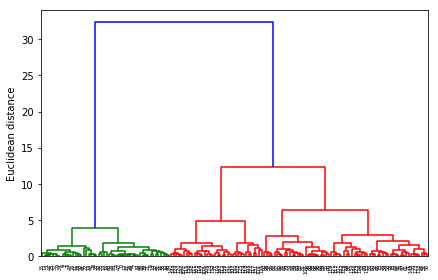

In [15]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       #labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300, 
#            bbox_inches='tight')
plt.show()

# 看似分兩群也不錯，但實務上要做分群，好像真的有點藝術成分或靠領域知識？

C:\Users\meichunchen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


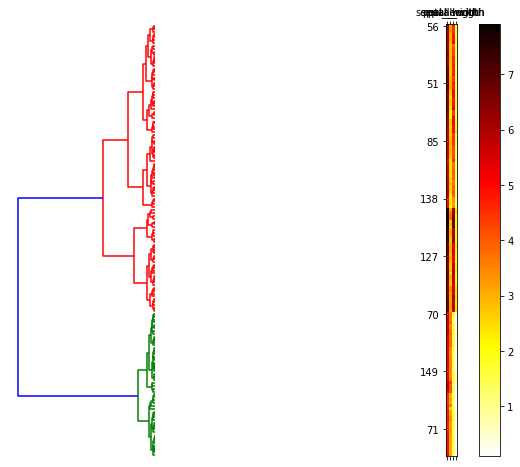

In [16]:
# plot row dendrogram
fig = plt.figure(figsize=(10,10))
axd = fig.add_axes([0.09,0.1,0.2,0.6]) #設定X Y 軸 位置 高度 寬度
row_dendr = dendrogram(row_clusters, orientation='left') #right 將樹狀圖以逆時針轉90度

# reorder data with respect to clustering
#df_rowclust 原始的資料集
#dendrogram樹狀圖物件本身是個字典的leaves鍵，藉此可以讀到集群標籤
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axd.set_xticks([]) 
axd.set_yticks([]) 
#移除掉軸的刻度以便修改熱度圖的顏色
# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)


        
# plot heatmap
axm = fig.add_axes([0.23,0.1,0.6,0.6]) # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r') #將重新排列的dataframe把入熱度圖
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

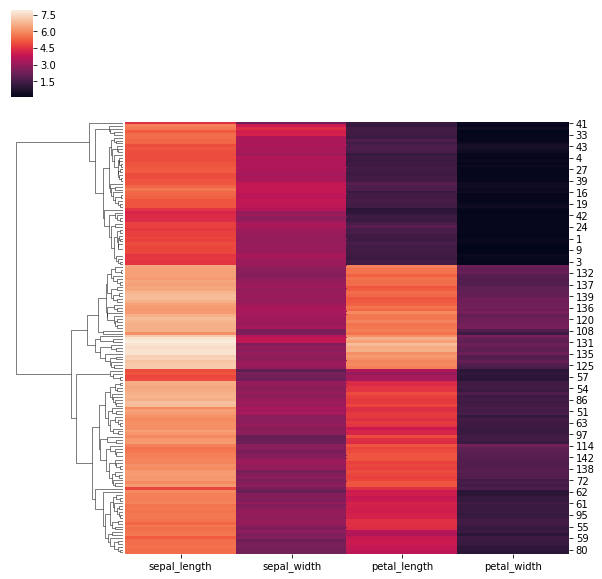

In [18]:
# seaborn 用在漸層圖
import seaborn as sns

sns.clustermap(df,col_cluster=False)

In [22]:
import seaborn as sns
seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', 
                   z_score=None, standard_scale=None, figsize=None, cbar_kws=None, 
                   row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, 
                   row_colors=None, col_colors=None, mask=None, **kwargs)

NameError: name 'seaborn' is not defined

In [23]:
http://seaborn.pydata.org/generated/seaborn.clustermap.html

SyntaxError: invalid syntax (<ipython-input-23-987789e89d9d>, line 1)

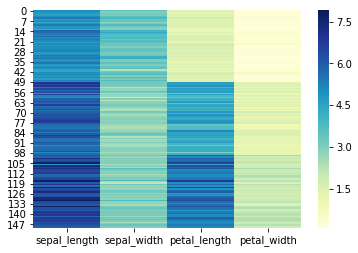

In [21]:
import numpy as np
import seaborn as sns
ax = sns.heatmap(df, cmap="YlGnBu")

In [ ]:
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, 
                fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, 
                cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

In [ ]:
http://seaborn.pydata.org/generated/seaborn.heatmap.html

# BIRCH

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html#sklearn.cluster.Birch

In [ ]:
1) threshold :即葉節點每個CF的最大樣本半徑閾值T，它決定了每個CF裡所有樣本形成的超球體的半徑閾值。
    一般來說threshold越小，則CF Tree的建立階段的規模會越大，即BIRCH算法第一階段所花的時間和內存會越多。
    但是選擇多大以達到聚類效果則需要通過調參決定。默認值是0.5.如果樣本的方差較大，則一般需要增大這個默認值。

2) branching_factor：即CF Tree內部節點的最大CF數B，以及葉子節點的最大CF數L。這裡scikit-learn對這兩個參數進行了統一取值。
    也就是說，branching_factor決定了CF Tree裡所有節點的最大CF數。默認是50。如果樣本量非常大，比如大於10萬，
    則一般需要增大這個默認值。選擇多大的branching_factor以達到聚類效果則需要通過和threshold一起調參決定

3）n_clusters：即類別數K，在BIRCH算法是可選的，如果類別數非常多，我們也沒有先驗知識，則一般輸入None，
    此時BIRCH算法第4階段不會運行。但是如果我們有類別的先驗知識，則推薦輸入這個可選的類別值。默認是3，即最終聚為3類。

4）compute_labels：布爾值，表示是否標示類別輸出，默認是True。一般使用默認值挺好，這樣可以看到聚類效果。

In [ ]:
from sklearn.cluster import Birch

#db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit(X)
bb = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5).fit(X) #因為上面例子分群效果太差，所以用內設值試試看


# 印出分群結果
print("分群結果：")
print(bb.labels_)
print("----------我是87分的分隔線----------")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print("----------我是87分的分隔線----------")

bby_pred = bb.fit_predict(X)
plt.scatter(X[iris_y==0,0], 
            X[iris_y==0,1], 
            s=87, 
            c='lightgreen', 
            marker='s', 
            label='iris_y=0')
plt.scatter(X[iris_y==1,0], 
            X[iris_y==1,1], 
            s=87, 
            c='orange', 
            marker='o', 
            label='iris_y=1')
plt.scatter(X[iris_y==2,0], 
            X[iris_y==2,1], 
            s=87, 
            c='lightblue', 
            marker='v', 
            label='iris_y=2')
plt.legend()
plt.grid()
plt.tight_layout()

plt.scatter(X[:, 0], X[:, 1], c=bby_pred)
plt.show()

In [ ]:
bb.root_ 

In [ ]:
bb.dummy_leaf_ 

In [ ]:
bb.subcluster_centers_

In [ ]:
bb.subcluster_labels_ 

In [ ]:
from sklearn.cluster import Birch

#db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit(X)
bb = Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.5).fit(X) #因為上面例子分群效果太差，所以用內設值試試看


# 印出分群結果
print("分群結果：")
print(bb.labels_)
print("----------我是87分的分隔線----------")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)
print("----------我是87分的分隔線----------")

bby_pred = bb.fit_predict(X)
plt.scatter(X[iris_y==0,0], 
            X[iris_y==0,1], 
            s=87, 
            c='lightgreen', 
            marker='s', 
            label='iris_y=0')
plt.scatter(X[iris_y==1,0], 
            X[iris_y==1,1], 
            s=87, 
            c='orange', 
            marker='o', 
            label='iris_y=1')
plt.scatter(X[iris_y==2,0], 
            X[iris_y==2,1], 
            s=87, 
            c='lightblue', 
            marker='v', 
            label='iris_y=2')
plt.legend()
plt.grid()
plt.tight_layout()

plt.scatter(X[:, 0], X[:, 1], c=bby_pred)
plt.show()

In [ ]:
bb.labels_